In [ ]:
import skimage
import cv2
import matplotlib.pyplot as plt
import numpy as np

(a)

In [ ]:
# Download image # 07 from the Kodak dataset
!wget https://r0k.us/graphics/kodak/kodak/kodim07.png

--2025-01-21 02:26:42--  https://r0k.us/graphics/kodak/kodak/kodim07.png
Resolving r0k.us (r0k.us)... 185.151.30.215, 2a07:7800::215
Connecting to r0k.us (r0k.us)|185.151.30.215|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 566322 (553K) [image/png]
Saving to: ‘kodim07.png.1’

kodim07.png.1       100%[===================>] 553.05K   783KB/s    in 0.7s    

2025-01-21 02:26:44 (783 KB/s) - ‘kodim07.png.1’ saved [566322/566322]



(b)

In [ ]:
# Load the image into a numpy array
clean_image = cv2.imread('kodim07.png') # Grouthtruth image
clean_image = clean_image[:,:,::-1] # Convert from BGR to RGB

In [ ]:
clean_image = clean_image.astype('float') # Convert into a floating point
clean_image_normalized = clean_image / 255
clean_image_normalized = np.clip(clean_image_normalized, 0, 1)

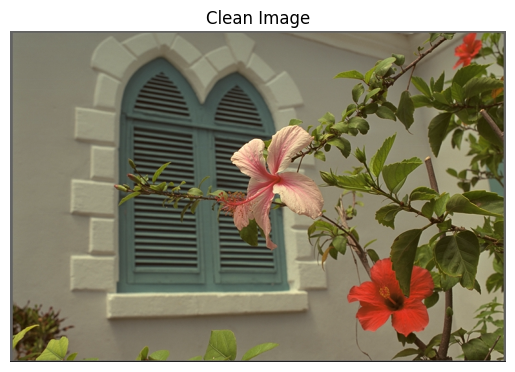

In [ ]:
# Display the image in a new figure
plt.imshow(clean_image_normalized)
plt.title('Clean Image')
plt.axis('off') # Remove axis tick marks
plt.show()

(c)

In [ ]:
# Add Gaussian noise with std dev = 0.1
noisy_image = clean_image_normalized + 0.1 * np.random.randn(*clean_image_normalized.shape)

noisy_image = np.clip(noisy_image, 0, 1)

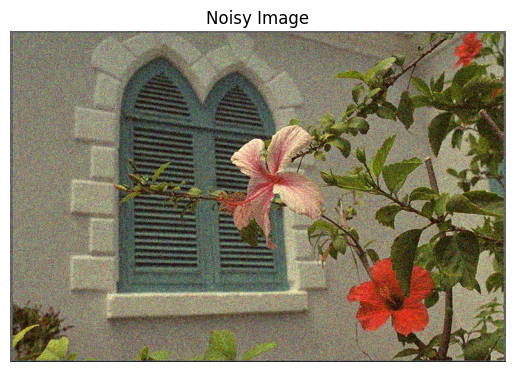

In [ ]:
# Display the image in a new figure
plt.imshow(noisy_image)
plt.title('Noisy Image')
plt.axis('off') # Remove axis tick marks
plt.show()

(d)

In [ ]:
# Calculate and print MSE
skimage.metrics.mean_squared_error(clean_image_normalized, noisy_image)

0.009680508629747734

In [ ]:
# Calculate and print PSNR
skimage.metrics.peak_signal_noise_ratio(clean_image_normalized, noisy_image)

20.14101823550121

(e)

In [ ]:
from skimage import img_as_float, restoration, util

# Initialize variables to store the best results
best_mse = float('inf')
best_psnr = float('-inf')
best_params = {}

# Define parameter ranges
win_sizes = [3, 5, 7, 11, 15, 17, 21]  # Window sizes to test
sigma_colors = [0.005, 0.01, 0.02, 0.05, 0.1, 0.15, 0.2]  # Sigma_color values to test
sigma_spatials = [1, 3, 5, 7, 10]

# Perform grid search over parameters
for win_size in win_sizes:
    for sigma_color in sigma_colors:
        for sigma_spatial in sigma_spatials:
            denoised = restoration.denoise_bilateral(
                noisy_image,
                win_size=win_size,
                sigma_color=sigma_color,
                sigma_spatial=sigma_spatial,
                channel_axis=-1,
            )
            mse = skimage.metrics.mean_squared_error(clean_image_normalized, denoised)
            psnr = skimage.metrics.peak_signal_noise_ratio(clean_image_normalized, denoised)

            if mse < best_mse or (mse == best_mse and psnr > best_psnr):
                best_mse = mse
                best_psnr = psnr
                best_params = {"win_size": win_size, "sigma_color": sigma_color, "sigma_spatial": sigma_spatial}

# Display the results
print(f"Best MSE: {best_mse:.6f}")
print(f"Best PSNR: {best_psnr:.2f} dB")
print(f"Best Parameters: {best_params}")

Best MSE: 0.001194
Best PSNR: 29.23 dB
Best Parameters: {'win_size': 5, 'sigma_color': 0.1, 'sigma_spatial': 7}


0.05 sigma color, winsize 3

(f)

Text(0.5, 1.0, 'Denoised Image')

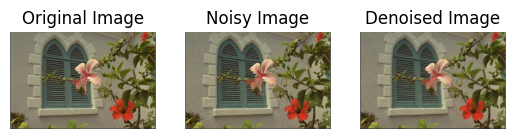

In [ ]:
# Visualize the original, noisy, and denoised images
denoised_best = restoration.denoise_bilateral(
    noisy_image, win_size=best_params['win_size'], sigma_color=best_params['sigma_color'], channel_axis=-1
)

fig, ax = plt.subplots(1, 3)

ax[0].imshow(clean_image_normalized, cmap="gray")
ax[0].axis("off")
ax[0].set_title("Original Image")

ax[1].imshow(noisy_image, cmap="gray")
ax[1].axis("off")
ax[1].set_title("Noisy Image")

ax[2].imshow(denoised_best, cmap="gray")
ax[2].axis("off")
ax[2].set_title("Denoised Image")

In [ ]:
# Create a .bib file in Colab
references = """
    @online{geeksforgeeks2025,
    author = {GeeksforGeeks},
    title = {Image Restoration using Spatial Filtering},
    year = {2025},
    url = {https://www.geeksforgeeks.org/image-restoration-using-spatial-filtering/},
    note = {Accessed: January 20, 2025}
}
"""
# Save the references to a .bib file
with open("references.bib", "w") as file:
    file.write(references)

In [ ]:
# connect the google colab notebook to google drive before creating pdf
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install nbconvert >/dev/null
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc >/dev/null

In [ ]:
!jupyter nbconvert --to pdf --PDFExporter.verbose=True "/content/drive/MyDrive/Colab Notebooks/Saeah Problem Set 1.ipynb" >/dev/null

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Saeah Problem Set 1.ipynb to pdf
[NbConvertApp] Support files will be in Saeah Problem Set 1_files/
[NbConvertApp] Making directory ./Saeah Problem Set 1_files
[NbConvertApp] Writing 36930 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 676928 bytes to /content/drive/MyDrive/Colab Notebooks/Saeah Problem Set 1.pdf
